<a href="https://colab.research.google.com/github/Leonel-Jeffrey/COMP-1828/blob/main/comp_1828_20210927_01_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asymptotic complexity
- COMP 1828 IT lab: 27 Sep 2021
$\newcommand{\Vec}[1]{\boldsymbol{#1}}$
$\newcommand{\Mat}[1]{\boldsymbol{#1}}$
## Aim
- Revise the (rough) definition of the complexity.
## Note: to execute a cell, press SHIFT + ENTER

## Before tackling problems, please import libraries by executing this cell.
- matplotlib: for plotting
- NumPy: for vectors, matrices


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt # for plotting
import seaborn as sns; sns.set()  # for plot styling
import numpy as np # linear algebra library

## Revision: Asymptotic complexity
- Basic ideas: 
  - ignore a constant factor,
  - consider a sufficiently large argument.
- **Big-O**: $T(n) = O(g(n))$: $T(n)$ is asymptotically upper-bounded by $g(n)$.
  - Mathematical definition: $\exists M > 0, \exists n_0 \ge 0: n \ge n_0 \Rightarrow T(n) \le M g(n)$.
  - For sufficiently large $n$, $T(n)$ is upper-bounded by $g(n)$ up to a constant factor.
- **Big-Omega**: $T(n) = \Omega (g(n))$: $T(n)$ is asymptotically lower-bounded by $g(n)$.
  - Mathematical definition: $\exists M > 0, \exists n_0 \ge 0: n \ge n_0 \Rightarrow T(n) \ge M g(n)$.
  - For sufficiently large $n$, $T(n)$ is lower-bounded by $g(n)$ up to a constant factor.
- **Big-Theta**: $T(n) = \Theta (g(n))$: $T(n)$ is asymptotically lower-bounded by $g(n)$.
  - Mathematical definition: $T(n) = O(n)$ and $T(n) = \Omega(n)$.
  - For sufficiently large $n$, $T(n)$ is upper and lower-bounded by $g(n)$ up to a constant factor (different constants for upper and lower-bounded).


## Question 1
(a) The following algorithms examined have revealed what their operation count is. 
Using this as a starting point what is the order ($\Theta$) for each of the algorithms below? Where $n$ denotes the size of the problem input:
- Algorithm A: $n^4 + 2n + 1$,
- Algorithm B: $3n^2 + 4000 n + 2000$,
- Algorithm C: $2^n + n^2$,
- Algorithm D: $n + 100 n \log_2 n + 10000$.

(b) Which is the most and least efficient of the algorithms above when

- i). $n = 10$,

- ii). $n = 10^3 = 1000$.


You can use the following cell as a calculator

In [17]:
import numpy as np
print('Algorithm A with n = 10:', 10 ** 4 + 2 * 10 + 1)
print('Algorithm B with n = 10:', 3 * (10 ** 2) + 4000 * 10 + 2000)
print('Algorithm C with n = 10:', 2 ** 10 + 10 ** 2)
print('Algorithm D with n = 10:', 10 + 100 * 10 * np.log2(10) + 10000)


Algorithm A with n = 10: 10021
Algorithm B with n = 10: 42300
Algorithm C with n = 10: 1124
Algorithm D with n = 10: 13331.928094887362


Note: in this big data era, $n$ can be $10^7$ or $10^8$; hence the asymptotic complexity is getting more important.

## Question 2
The table below gives the complexities of some sorting algorithms.

| Sorting algorithm | Worst case time complexity | Average time complexity | (Auxiliary) space complexity |
| :--- | ---: | ---: | ---: |
| bubble sort | $\Theta (n^2)$ | $\Theta (n^2)$ | $\Theta (1)$ |
| heap sort | $\Theta (n \log n)$ | $\Theta (n \log n)$ | $\Theta (1)$ |
| merge sort | $\Theta (n \log n)$ | $\Theta (n \log n)$ | $\Theta (n)$ |
| quick sort | $\Theta (n^2)$ | $\Theta (n \log n)$ | $\Theta (n \log n)$ |

For a list of $n$ elements that need to be sorted, comment of the efficiency of the algorithms. 
Which is the best, worst and which would you recommend in that case.

- i). $n = 10$,

- ii). $n = 10^7 = 10000000$.


### Question 2 Appendix: Calculate the elapsed time
In the following cell, we calculate the elapsed time of aort algorithms for sequences of size $n = 1, 2, \dots, 100$. The execution may take a few minutes.

In [18]:
import numpy as np
import time
ns = 500 * np.arange(10, dtype=int)

def bubble_sort(seq):
  n = len(seq)
  for i in range(n):
    for j in range(n-1, i, -1):
        if seq[j-1] > seq[j]:
          seq[j], seq[j-1] = seq[j-1], seq[j]
  return seq

sort_algs = {
  'bubble': lambda x: bubble_sort(x),
  'heap': lambda x: np.sort(x, kind='heapsort'),
  'merge': lambda x: np.sort(x, kind='mergesort'),
  'quick': lambda x: np.sort(x, kind='quicksort'),
}
elapsed_times = {alg_name: np.zeros_like(ns, dtype=float) for alg_name in sort_algs}

for i, n in enumerate(ns):
  seq = np.random.default_rng(0).choice(n, size=n, replace=False) # random sequence
  for alg_name, sort_alg in sort_algs.items():
    starting_time = time.time()
    sorted_seq = sort_alg(seq)
    end_time = time.time()
    elapsed_times[alg_name][i] = end_time - starting_time


### Question 2 Appendix: Plot the elapsed time of sort algorithms

Text(0.5, 1.0, 'Elapsed times of sort algorithms')

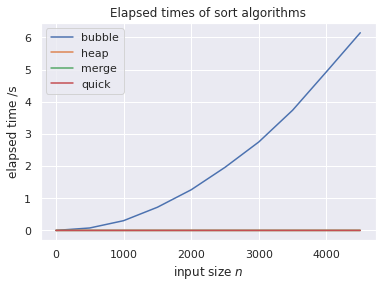

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
for alg_name, elapsed_time in elapsed_times.items():
  plt.plot(ns, elapsed_time, label=alg_name)
plt.xlabel('input size $n$')
plt.ylabel('elapsed time /s')
plt.legend()
plt.title('Elapsed times of sort algorithms')

Note: if it took 5 seconds to show the search result, customers would not use your website.

### Question 2 Appendix: Plot the elapsed time of sort algorithms (other than the quick sort)

Text(0.5, 1.0, 'Elapsed times of sort algorithms')

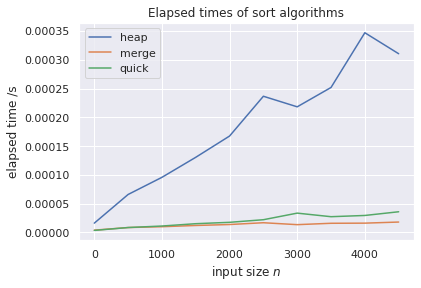

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
for alg_name, elapsed_time in {alg_name: elapsed_time for alg_name, elapsed_time in elapsed_times.items() if alg_name != 'bubble'}.items():
  plt.plot(ns, elapsed_time, label=alg_name)
plt.xlabel('input size $n$')
plt.ylabel('elapsed time /s')
plt.legend()
plt.title('Elapsed times of sort algorithms')

## Question 3
A square matrix has the same number of rows and columns and its size is defined by the variable $n$. 
Below is a code to generate two random matrices `A` and `B` of the size of `n`.



In [21]:
# Students do not need to understand this cell.
import numpy as np
def gen_rand_sq_mat(n):
  max_int = 2000
  rng = np.random.default_rng(0)
  A, B = rng.integers(max_int, size=[n, n]), rng.integers(max_int, size=[n, n])
  return A, B
A, B = gen_rand_sq_mat(n=5)
print('A =')
display(A)
print('B =')
display(B)

A =


array([[1701, 1273, 1022,  539,  615],
       [  81,  150,   33,  350, 1626],
       [1298, 1825, 1007, 1213, 1941],
       [1458, 1264, 1087, 1119, 1870],
       [ 554, 1631, 1341,    5,  788]])

B =


array([[1714, 1108,   67, 1529, 1459],
       [1693,  351,  178, 1726,   44],
       [1082,  160,  599,  962,  845],
       [ 806,   56,   10,  248,   16],
       [1341, 1051, 1294,  514, 1230]])

The code fragment below performs the multiplication of two square matrices `A` and `B` and stores the result in matrix `C`.

In [22]:
def mat_mul(A, B, n):
  # initialize `C`: Please ignore this line from the complexity discussion.
  C = np.zeros([n, n], dtype=int)

  #loop over rows
  for i in range(n):
    #loop over columns
    for j in range(n):
      #initialise element c[i,j]
      C[i, j] = 0
      #process row-column interactions and sum them into array c
      for k in range(n):
        C[i, j] = C[i, j] + A[i, k] * B[k, j]
  return C

**Question**: what is the computational complexity in terms of $n$ (`n` in the code) for the algorithm? 
Here, assume that it takes time $c$ for each assignment, addition, and multiplication operation.


### Question 3 Appendix: Calculate the elapsed time
In the following cell, we calculate the elapsed time of matrix multiplication for matrices of size $n = 1, 2, \dots, 100$. The execution may take a few minutes.

In [23]:
import time
ns = np.arange(100, dtype=int)
elapsed_times = np.zeros_like(ns, dtype=float)
for i, n in enumerate(ns):
  A, B = gen_rand_sq_mat(n)
  starting_time = time.time()
  C = mat_mul(A, B, n)
  end_time = time.time()
  elapsed_times[i] = end_time - starting_time


### Question 3 Appendix: Plot the elapsed time

Text(0, 0.5, 'elapsed time /s')

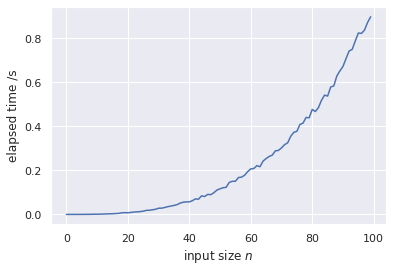

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.plot(ns, elapsed_times)
plt.xlabel('input size $n$')
plt.ylabel('elapsed time /s')

### Question 3 Appendix: Scale the x-axis to see the asymptotic complexity describes the behaviour of the performance for a large $n$. (PLEASE MODIFY CODES)

In [25]:
import numpy as np

def complexity_scale(n):
  # ---- Modify codes here ---- #
  # Assign the asymptotic complexity of the algorithm `mat_mul`.
  # Example 1: If the algorithm is on the order of n^5, then please assign
  # complexity = n ** 5
  # Example 2: If the algorithm is on the order of 2^n log n, then please assign
  # complexity = n * np.log2(n) 
  complexity = n * np.log2(n)
  # ---- Modify codes here ---- #
  return complexity

### Question 3 Appendix: Plot with the scaled x-axis
If you define the `complexity_scale` function correctly, the plot will look like a linear function.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log2
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'elapsed time')

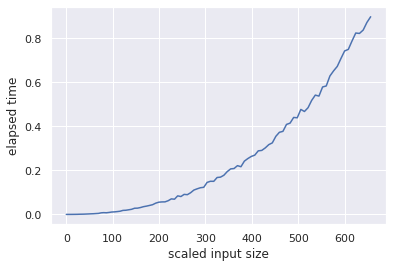

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.plot(complexity_scale(ns), elapsed_times)
plt.xlabel('scaled input size')
plt.ylabel('elapsed time')

Note: Let's check the result.

In [ ]:
print('The result of numpy multiplication:')
display(A @ B)
print('The result by our implementation:')
display(mat_mul(A, B, n))

The result of numpy multiplication:


array([[ 95917373, 107581091,  91682683, ...,  99314384,  86674112,
         98180917],
       [105012651, 125254042, 100360427, ..., 114697492,  89680525,
        101816679],
       [ 99170527, 106872373,  82895258, ...,  98018404,  79611097,
        103831469],
       ...,
       [106283206, 111303997,  92370045, ..., 108085004,  93950658,
        102789533],
       [102585998, 114499234,  96574703, ..., 109148927,  93773337,
         99194409],
       [ 90297021,  99588345,  81277110, ...,  95696575,  83902039,
         91880523]])

The result by our implementation:


array([[ 95917373, 107581091,  91682683, ...,  99314384,  86674112,
         98180917],
       [105012651, 125254042, 100360427, ..., 114697492,  89680525,
        101816679],
       [ 99170527, 106872373,  82895258, ...,  98018404,  79611097,
        103831469],
       ...,
       [106283206, 111303997,  92370045, ..., 108085004,  93950658,
        102789533],
       [102585998, 114499234,  96574703, ..., 109148927,  93773337,
         99194409],
       [ 90297021,  99588345,  81277110, ...,  95696575,  83902039,
         91880523]])